In [30]:
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to Scientific Programming in Python

## Python Course Lecture 5: Matrices and Image Analysis

# A Matrix is a Multi-Dimensional Array.
  - 1D Array: A **Row** of **Elements**
  - 2D Array: A **Column** of **Rows** of **Elements**
  - 3D Array: A **Sheet** of **Columns** of **Rows** of **Elements**

In [39]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
A


[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

## NumPy Arrays Understand Lists of Lists to be 2D!

In [41]:
import numpy as np
mat = np.array(A)
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [42]:
mat * 5

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

## New Array Properties: Shape, ndim

**array.ndim**: The number of dimensions an array has.

In [43]:
mat.ndim

2

**array.shape**: The length in each dimension of the array.

In [44]:
mat.shape

(3, 3)

## Transposing a Matrix
Transposing a matrix means swapping the first and second axis, flipping it along its diagonal.  In NumPy, there is an equivalent **array.transpose()** method and an **array.T** property.  There's also the more general **array.swapaxes()** method.

In [18]:
mat.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [46]:
mat.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [47]:
mat.swapaxes(0, 1)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

## Many Math Functions work on a default axis, which can be modified using the "axis" keyword argument.

In [48]:
np.mean(mat)

5.0

In [11]:
np.mean(mat, axis=0)

array([ 4.,  5.,  6.])

In [49]:
np.mean(mat, axis=1)

array([ 2.,  5.,  8.])

## By default, NumPy will remove unnecessary dimensions.  To turn off this behavior, set  "keepdims" to True

In [51]:
np.mean(mat, axis=1, keepdims=True)

array([[ 2.],
       [ 5.],
       [ 8.]])

## Indexing and Slicing Multidimensional Arrays: Rows, then Columns

In [14]:
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [56]:
# mat[0], mat[:,0], mat[0, :], mat[0, 0], mat[0][0], mat[:, [0]]
mat[0][1]

2

## Array Broadcasting Applies across the Highest Dimension

In [16]:

mat[np.array([True, True, False])]

array([[1, 2, 3],
       [4, 5, 6]])

In [57]:
mat.T * [1, 10, 100]

array([[  1,  40, 700],
       [  2,  50, 800],
       [  3,  60, 900]])

## Reshaping arrays

In [62]:
new_shape = (3, 4)
B = np.arange(12).reshape((3, 4))
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [63]:
np.zeros(new_shape)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

## For Matrix (Dot) Multiplication, use numpy.dot()

In [64]:
Image(url="https://www.mathsisfun.com/algebra/images/matrix-multiply-a.gif", width=300)

In [65]:
A_dot = A @ A.T

SyntaxError: invalid syntax (<ipython-input-65-6fd3df724377>, line 1)

## Other Key Matrix Functions can be found in numpy.linalg

### numpy.linalg.norm: Length of a vector

In [66]:
np.linalg.norm([2, 4])

4.4721359549995796

### numpy.linalg.inv: Inverse of the Matrix

In [67]:
np.linalg.inv([[2, 2], [3, 2]])

array([[-1. ,  1. ],
       [ 1.5, -1. ]])

### Cross Product

In [70]:
np.cross(mat[:, 0], mat[:, 1])

array([-3,  6, -3])

### Diagonal

In [72]:
mat.diagonal()

array([1, 5, 9])

## Alternative to np.array: np.matrix
Arrays can do everything, but numpy also has a matrix type for doing matrix math specifically.  This can be formed using **np.matrix**, **np.mat**, or **np.asmatrix**

In [73]:
M = np.matrix([[2, 3], [2, 2]])
M

matrix([[2, 3],
        [2, 2]])

In [74]:
# Matrix objects do matrix multiplication by default
M * M

matrix([[10, 12],
        [ 8, 10]])

In [75]:
# Matrix inversion is also easier!
M.I

matrix([[-1. ,  1.5],
        [ 1. , -1. ]])

In [76]:
# Convert back to array:
np.array(M)
M.getA()

array([[2, 3],
       [2, 2]])

# Visualizing Matrices

In [77]:
x = np.linspace(0, 4 * np.pi, 50)
signal = np.array([np.sin(x), np.sin(x), np.cos(x)]).T
noise = np.random.randn(*signal.shape) * .4
data = signal + noise
data[:5, :]

array([[ 0.3359663807,  0.0022161774,  1.2006316976],
       [-0.3578795743,  0.4400112299,  0.5494289088],
       [ 1.0960110649,  0.5616341139,  0.6446998002],
       [ 0.3500686213,  0.8417919824,  0.7610858836],
       [ 1.2896489464,  0.6961206804,  0.3441509424]])

## numpy.set_printoptions(suppress=True, precision=2)
Makes the numbers print differently, without changing their actual values.  

In [80]:
np.set_printoptions(suppress=True, precision=2)
data[:5, :]

array([[ 0.34,  0.  ,  1.2 ],
       [-0.36,  0.44,  0.55],
       [ 1.1 ,  0.56,  0.64],
       [ 0.35,  0.84,  0.76],
       [ 1.29,  0.7 ,  0.34]])

## plt.imshow() displays matrix values using color values

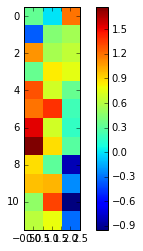

In [82]:
plt.imshow(data[:12, :], interpolation='nearest')
plt.colorbar()

## Color-value mappings are represented by a "colormap"
There are lots of pre-made colormaps out there, each serving different purposes!

In [23]:
Image(url="http://www.astrouw.edu.pl/~jskowron/python/cmap_all.png", width=600)

## Quick Discussion: Colormaps Can Be Misleading when Used Inappropriately

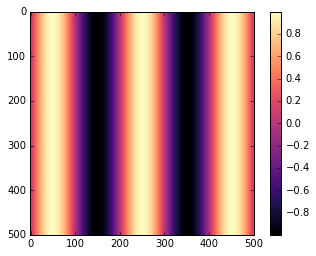

In [85]:
sines = np.repeat(np.matrix(np.sin(np.linspace(0, 5 * np.pi, 500))), 500, axis=0)
plt.imshow(sines, cmap='magma')
plt.colorbar()

Tip: Use 'viridis', 'magma',  instead of the default 'jet' colormap. 

For More Info on perception and colormaps: 
  - https://bids.github.io/colormap/
  - https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
  - http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
  - http://matplotlib.org/users/colormaps.html
  - http://www.husl-colors.org/  
  
  

## Correlation Matrices!

In [86]:
data_corr = np.corrcoef(data, rowvar=False)
data_corr

array([[ 1.  ,  0.73,  0.07],
       [ 0.73,  1.  ,  0.09],
       [ 0.07,  0.09,  1.  ]])

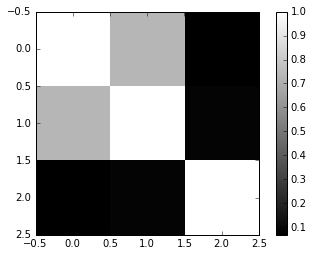

In [88]:
plt.imshow(data_corr, interpolation='nearest', cmap='gray')
plt.colorbar()

# Discussion